Dataset: https://www.kaggle.com/datasets/crawlfeeds/zara-us-fashion-products-dataset?resource=download

In [185]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

Creating a dataframe to store the file content

In [8]:
df = pd.read_json('zara_us_sample_data.json')

In [9]:
df.head()

,url,language,name,sku,mpn,brand,description,price,currency,availability,condition,images,color,size_list,scraped_at
0,https://www.zara.com/us/en/satin-effect-corset...,en-US,SATIN EFFECT CORSET BODYSUIT,128666521-966-2,128666521-966-2,ZARA,Bodysuit with sweetheart neckline and adjustab...,29.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Pale pink | 0219/805,S/M/L,2021-10-13 01:21:25
1,https://www.zara.com/us/en/long-print-dress-p0...,en-US,LONG PRINT DRESS,142448983-701-1,142448983-701-1,ZARA,Long dress with round neck and long sleeves. B...,49.9,USD,,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Brick | 9329/912,XS/XS/ -/ /We'll let you know when the item is...,2021-10-13 01:21:25
2,https://www.zara.com/us/en/steel-kitchen-sciss...,en-US,STEEL KITCHEN SCISSORS,125067259-220-99,125067259-220-99,ZARAHOME,Forged stainless steel kitchen scissors.,49.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Steel | 2967/479,8 x 20 x 1 cm,2021-10-13 01:21:25
3,https://www.zara.com/us/en/linen-blend-striped...,en-US,LINEN BLEND STRIPED ORGANIZER,135325938-737-99,135325938-737-99,ZARAHOME,Hanging organizer made of a cotton linen blend...,49.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Brown / Taupe | 5668/522,50 x 5 x 60 cm,2021-10-13 01:21:25
4,https://www.zara.com/us/en/chiffon-organizer-w...,en-US,CHIFFON ORGANIZER WITH MOONS AND STARS,138551470-727-99,138551470-727-99,ZARAHOME,Hanging organizer made of cotton chiffon. Feat...,35.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Vanilla | 5641/522,30 x 5 x 60 cm,2021-10-13 01:21:25


In [12]:
df.shape  #number of rows and columns

(1516, 15)

 deleting a column 'mpn' as it had same data as 'sku'

In [15]:
df.drop('mpn' , inplace = True, axis=1) 

In [16]:
df.head()

,url,language,name,sku,brand,description,price,currency,availability,condition,images,color,size_list,scraped_at
0,https://www.zara.com/us/en/satin-effect-corset...,en-US,SATIN EFFECT CORSET BODYSUIT,128666521-966-2,ZARA,Bodysuit with sweetheart neckline and adjustab...,29.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Pale pink | 0219/805,S/M/L,2021-10-13 01:21:25
1,https://www.zara.com/us/en/long-print-dress-p0...,en-US,LONG PRINT DRESS,142448983-701-1,ZARA,Long dress with round neck and long sleeves. B...,49.9,USD,,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Brick | 9329/912,XS/XS/ -/ /We'll let you know when the item is...,2021-10-13 01:21:25
2,https://www.zara.com/us/en/steel-kitchen-sciss...,en-US,STEEL KITCHEN SCISSORS,125067259-220-99,ZARAHOME,Forged stainless steel kitchen scissors.,49.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Steel | 2967/479,8 x 20 x 1 cm,2021-10-13 01:21:25
3,https://www.zara.com/us/en/linen-blend-striped...,en-US,LINEN BLEND STRIPED ORGANIZER,135325938-737-99,ZARAHOME,Hanging organizer made of a cotton linen blend...,49.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Brown / Taupe | 5668/522,50 x 5 x 60 cm,2021-10-13 01:21:25
4,https://www.zara.com/us/en/chiffon-organizer-w...,en-US,CHIFFON ORGANIZER WITH MOONS AND STARS,138551470-727-99,ZARAHOME,Hanging organizer made of cotton chiffon. Feat...,35.9,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Vanilla | 5641/522,30 x 5 x 60 cm,2021-10-13 01:21:25


checking if there any null values in the dataframe

In [19]:
df.isnull().values.any() 

False

In [18]:
df.isnull().sum().sum()

0

In [26]:
df.dtypes

url                     object
language                object
name                    object
sku                     object
brand                   object
description             object
price                  float64
currency                object
availability            object
condition               object
images                  object
color                   object
size_list               object
scraped_at      datetime64[ns]
dtype: object

converting datatypes of price column

In [31]:
df['price'] = df['price'].astype('int') 

In [32]:
df.dtypes

url                     object
language                object
name                    object
sku                     object
brand                   object
description             object
price                    int32
currency                object
availability            object
condition               object
images                  object
color                   object
size_list               object
scraped_at      datetime64[ns]
dtype: object

highest and lowest price of a product in the data-set

In [ ]:
df['price'].max() 

In [34]:
df['price'].min()

2

In [61]:
##Bottom 5 values in a column called 'price' in a dataframe called 'df'.
df.sort_values(by=['price']).head(5)


,url,language,name,sku,brand,description,price,currency,availability,condition,images,color,size_list,scraped_at
1119,https://www.zara.com/us/en/floral-print-tumble...,en-US,FLORAL PRINT TUMBLER,116908550-250-99,ZARAHOME,Glass tumbler with a floral print.,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color White | 6221/401,8.7 x 9 x 8.7 cm,2021-10-13 01:23:18
1075,https://www.zara.com/us/en/raised-square-desig...,en-US,RAISED SQUARE-DESIGN TUMBLER,121364859-990-99,ZARAHOME,Glass tumbler with raised square effect.,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,0284/401,4.5 x 12 x 8.5 cm,2021-10-13 01:23:14
1371,https://www.zara.com/us/en/hammered-tumbler-p4...,en-US,HAMMERED TUMBLER,122040891-990-99,ZARAHOME,Glass tumbler with a cut diamond pattern design.,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,2678/401,10.2 x 9.1 x 9.1 cm,2021-10-13 01:23:43
977,https://www.zara.com/us/en/transparent-soft-dr...,en-US,TRANSPARENT SOFT DRINK GLASS,122040912-990-99,ZARAHOME,Thick transparent glass soft drink tumbler wit...,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,1643/402,7 x 12.9 x 9.1 cm,2021-10-13 01:23:04
1145,https://www.zara.com/us/en/raised-design-paper...,en-US,RAISED DESIGN PAPER NAPKIN (PACK OF 20),111472745-710-99,ZARAHOME,Paper napkins with a textured design. Sold in ...,4,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Beige | 8286/022,Napkins/15 x 15 x 2 cm,2021-10-13 01:23:20


Plotting the bar graph of Bottom 5 products based on price

Text(0, 0.5, 'Products Name')

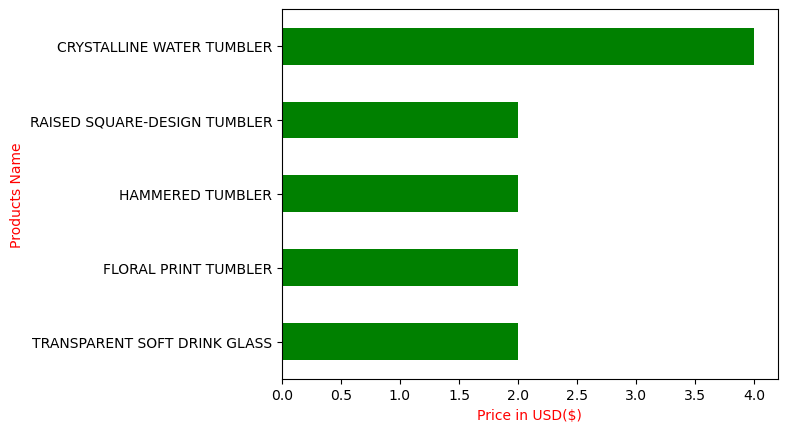

In [151]:
x = df.groupby('name')['price'].mean().sort_values().head(5)
x.plot(kind='barh', color='g')
plt.xlabel('Price in USD($)', color = 'r')
plt.ylabel('Products Name', color = 'r')

**Top 5 values in a column called 'price' in a dataframe.

In [133]:
df.sort_values('price', ascending=False).head(5)

,url,language,name,sku,brand,description,price,currency,availability,condition,images,color,size_list,scraped_at
1389,https://www.zara.com/us/en/jute-rug-p49838029....,en-US,JUTE RUG,115416723-052-81,ZARAHOME,Natural-colored jute rug.,449,USD,out of stock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Natural | 9838/029,"23,5 x 47 ""/449.00 USD/27,5 x 78,5 ""/89.90 USD...",2021-10-13 01:23:44
1226,https://www.zara.com/us/en/kassl-long-satin-ef...,en-US,KASSL LONG SATIN EFFECT COAT LIMITED EDITION,139613138-686-1,ZARA,KASSL oversized long cocoon coat made of doubl...,399,USD,out of stock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Dark maroon | 8747/822,XS/XS/ -/ /We'll let you know when the item is...,2021-10-13 01:23:29
403,https://www.zara.com/us/en/down-mattress-toppe...,en-US,DOWN MATTRESS TOPPER,142449640-250-12,ZARAHOME,Down and feather mattress cover. Achieve the h...,299,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color White | 0163/086,"Single ()/35,5 x 78,5 ""/299.00 USD/King ()/59 ...",2021-10-13 01:22:06
1281,https://www.zara.com/us/en/leather-high-heeled...,en-US,LEATHER HIGH HEELED BOOTS WITH CHAIN,137549565-040-36,ZARA,Heeled leather boots with metallic chain detai...,299,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Black | 1001/810,6/6½/7½/8/9/10,2021-10-13 01:23:34
1434,https://www.zara.com/us/en/oak-bedside-table-w...,en-US,OAK BEDSIDE TABLE WITH DRAWER,135326848-052-99,ZARAHOME,"Night table with drawer, made of 100% oak wood...",269,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Natural | 1598/072,45 x 55 x 35 cm,2021-10-13 01:23:49


***Plotting the bar graph with 5 highest priced products

Text(0.5, 0, 'Products Name')

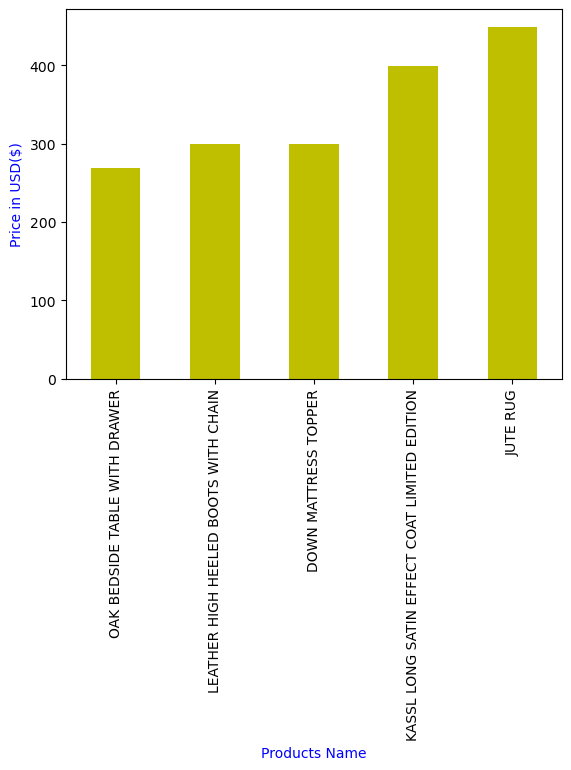

In [174]:
x = df.groupby('name')['price'].mean().sort_values().tail(5)
x.plot(kind='bar', color ='y')
plt.ylabel('Price in USD($)', color = 'b')
plt.xlabel('Products Name', color = 'b')

In [36]:
df['price'].mean() #average price

44.83970976253298

Finding how many items are InStock and out of stock

In [43]:
df['availability'].unique()

array(['InStock', ''], dtype=object)

In [44]:
df['availability'] = df['availability'].replace([''], 'out of stock')

In [45]:
df['availability'].unique()

array(['InStock', 'out of stock'], dtype=object)

***Finding how many products belong to ZARA and ZARAHOME and plotting the results in a pie chart

In [76]:
len(df[df['brand']=='ZARA'])

1270

In [79]:
len(df[df['brand']=='ZARAHOME'])

246

<AxesSubplot:xlabel='brand', ylabel='count'>

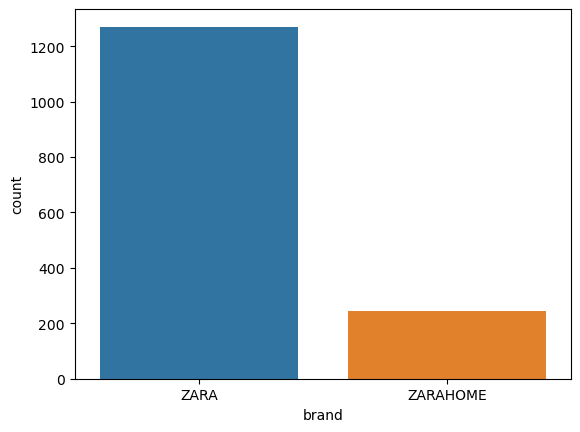

In [202]:
sns.countplot(x ='brand', data = df)

In [87]:
df[(df.price == df.price.max()) & (df.brand =='ZARAHOME')] #higest priced item in ZARAHOME

,url,language,name,sku,brand,description,price,currency,availability,condition,images,color,size_list,scraped_at
1389,https://www.zara.com/us/en/jute-rug-p49838029....,en-US,JUTE RUG,115416723-052-81,ZARAHOME,Natural-colored jute rug.,449,USD,out of stock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color Natural | 9838/029,"23,5 x 47 ""/449.00 USD/27,5 x 78,5 ""/89.90 USD...",2021-10-13 01:23:44


In [102]:
df[(df.price == df.price.min()) & (df.brand =='ZARAHOME')] #lowest priced item in ZARAHOME

,url,language,name,sku,brand,description,price,currency,availability,condition,images,color,size_list,scraped_at
977,https://www.zara.com/us/en/transparent-soft-dr...,en-US,TRANSPARENT SOFT DRINK GLASS,122040912-990-99,ZARAHOME,Thick transparent glass soft drink tumbler wit...,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,1643/402,7 x 12.9 x 9.1 cm,2021-10-13 01:23:04
1075,https://www.zara.com/us/en/raised-square-desig...,en-US,RAISED SQUARE-DESIGN TUMBLER,121364859-990-99,ZARAHOME,Glass tumbler with raised square effect.,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,0284/401,4.5 x 12 x 8.5 cm,2021-10-13 01:23:14
1119,https://www.zara.com/us/en/floral-print-tumble...,en-US,FLORAL PRINT TUMBLER,116908550-250-99,ZARAHOME,Glass tumbler with a floral print.,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,Color White | 6221/401,8.7 x 9 x 8.7 cm,2021-10-13 01:23:18
1371,https://www.zara.com/us/en/hammered-tumbler-p4...,en-US,HAMMERED TUMBLER,122040891-990-99,ZARAHOME,Glass tumbler with a cut diamond pattern design.,2,USD,InStock,NewCondition,https://static.zara.net/stdstatic/1.234.0-b.45...,2678/401,10.2 x 9.1 x 9.1 cm,2021-10-13 01:23:43


In [159]:
len(df[df['availability']=='InStock'])

1277

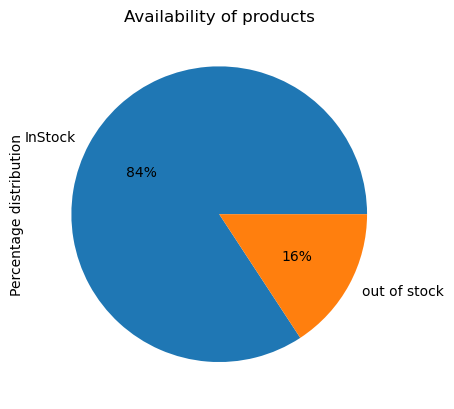

In [200]:
#df['availability'].value_counts().plot(kind='pie')
df.availability.str.get_dummies().sum().plot.pie(label='Percentage distribution', autopct='%1.0f%%')
plt.title('Availability of products')
plt.show()